In [86]:
########################  2D plot ##################
import h5py
import matplotlib.pyplot as plt
import numpy as np

### 1. Create theoretical Char Function Grid

In [87]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
from qutip.qip.operations import rx, ry

N = 20
## cavity operators
a = tensor(destroy(N), qeye(2))
## qubit operator 
sz = tensor(qeye(N), sigmaz())
sx = tensor(qeye(N), sigmax())
sy = tensor(qeye(N), sigmay())


def Rx(theta):
    return tensor(qeye(N), rx(theta))

def Ry(theta):
    return tensor(qeye(N), ry(theta))

# displacement operator 
def D(alpha):
    return (alpha*a.dag() - np.conjugate(alpha)*a).expm()

# conditional displacement operator 
def CD(beta):
    q = (a.dag()+a) # need to understand why this factor seems to recreate experimental data.
    p = 1j*(a.dag()-a)
    return (1j*(np.real(beta)*p + np.imag(beta)*q)*sz).expm()

"""Function that calculates the characteristic function of a cavity coupled to a qubit. The protocol is the same as in Eickbusch et al. fast universal control of an oscillator. 
The function takes the inputs

state -> state whos characteristic function we want to calculate. Should be of the form tensor(qubit,cavity)

beta -> a np.linspace object which will define the values over which we calculate the characteristic function.


"""


def char_func_grid(state, xvec):

    CF_real = np.empty((len(xvec),len(xvec)))

    for i, alpha in enumerate(xvec):
        for j, alpha2 in enumerate(xvec):
            state1 = Rx(np.pi/2)*state
            state2 = CD(2*(alpha + 1j*alpha2))*state1 
            state3 = Rx(np.pi/2)*state2  
            
            CF_real[i,j] =  - np.real(expect(sz,state3))
        
    return CF_real

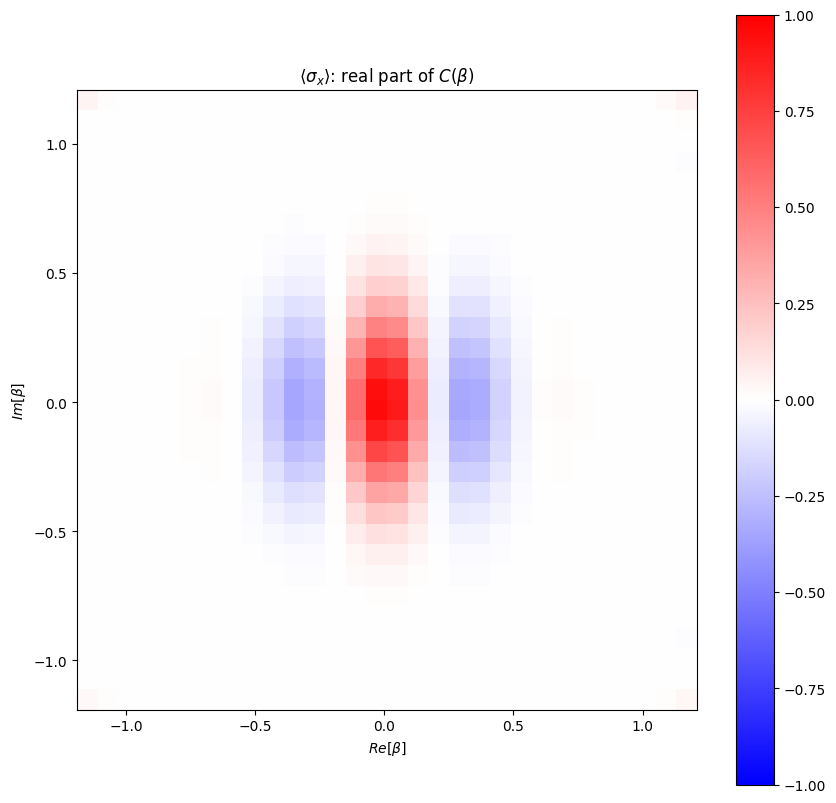

In [30]:
xvec = np.arange(-1.15, 1.15+0.08, 0.08) # -1.8 to including 1.8
state = tensor(coherent(N, np.exp(1j*(np.pi*1/2))),basis(2,0))
cf = char_func_grid(state, xvec)


fig, ax = plt.subplots(figsize=(10,10))
cs1= ax.pcolormesh(xvec, xvec, np.transpose(cf), cmap = 'bwr', vmin=-1, vmax=1, shading='auto')
ax.set_aspect('equal')
ax.set_xlabel(r'$ Re[\beta]$')
ax.set_ylabel(r'$ Im[\beta]$')
ax.set_title(r'$\langle \sigma_x\rangle$: real part of $ C(\beta)$')
fig.colorbar(cs1)

## 2. Load Experimental Data

In [116]:
# opening the file and loading the data
filepath = (
    r"C:\Users\jonat\Desktop\Coding\tcsim\Data Analysis\Data\195744_panther_ECD_char.h5"
)
f = h5py.File(filepath, "r")
data_iavg = f['data']['I_AVG']
data_iavg.shape
z = np.array(data_iavg) # minus sign to make epxeriment and simulation have the same polarity

In [117]:
# rescale data matrix to 1 to -1
def scale(col, min, max):
    range = col.max() - col.min()
    a = (col - col.min()) / range
    return a * (max - min) + min

zscale =scale(z,-1, 1)

Text(0.5, 1.0, 'Characteristic_function')

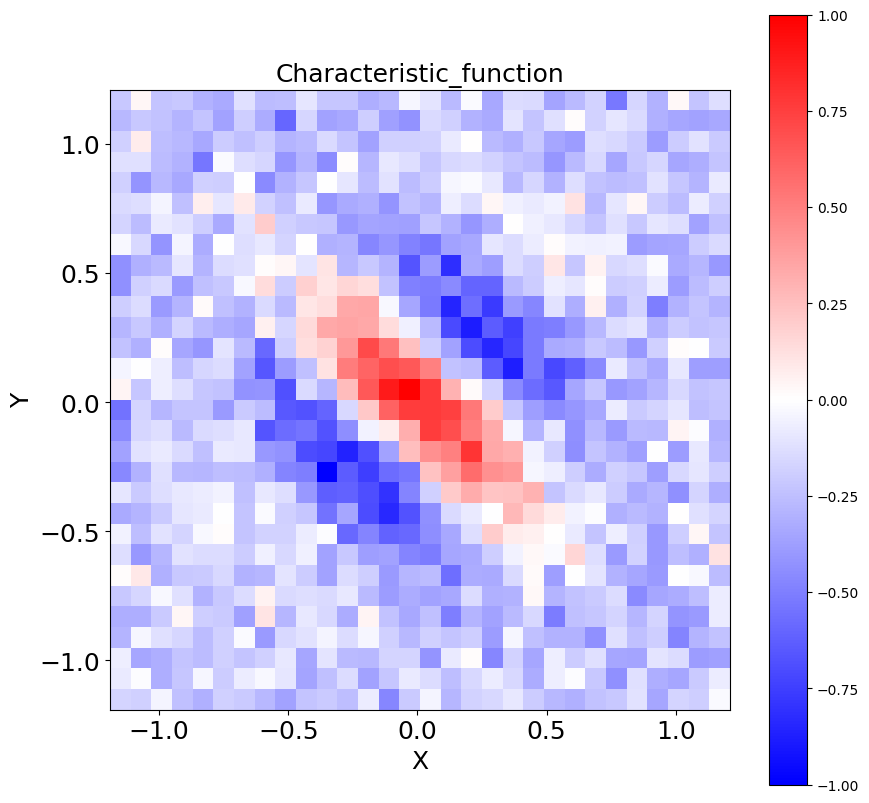

In [118]:

# Data Plotting
xvec = np.arange(-1.15, 1.15+0.08, 0.08) # -1.8 to including 1.8
yvec = np.arange(-1.15, 1.15+0.08, 0.08)

fig, ax = plt.subplots(figsize = (10,10) )
ax.set_aspect('equal')
plt.pcolormesh(xvec, yvec, zscale, cmap = 'bwr') # [4:31]
plt.colorbar()
plt.xlabel("X", fontsize = 18)
plt.ylabel('Y', fontsize = 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Characteristic_function', fontsize=18)


## 3. Find the Angle!!!

In [119]:
# Helper functions

# list of values to create coherent states
def angles(points):
    points = [np.exp(1j*(np.pi*(1*x/points+1/4))) for x in range(points+1)]
    return points

# norm is minimal for max overlap
def norm(X, Y):
    return np.sum((X-Y)**2)

def sherlock(data,points):
    norms = []
    for i in range(len(points)):
        # step 1. calculate theoretical char func grid
        state = (tensor(coherent(N, points[i]),basis(2,0)))
        cf = char_func_grid(state,xvec) # xvec has to be consistent for theory and data!!!
        norms.append(norm(cf,data))
        print('Done with step', i)
    return norms
        


    

In [120]:
points = angles(70)
norms = sherlock(zscale, points)

Done with step 0
Done with step 1
Done with step 2
Done with step 3
Done with step 4
Done with step 5
Done with step 6
Done with step 7
Done with step 8
Done with step 9
Done with step 10
Done with step 11
Done with step 12
Done with step 13
Done with step 14
Done with step 15
Done with step 16
Done with step 17
Done with step 18
Done with step 19
Done with step 20
Done with step 21
Done with step 22
Done with step 23
Done with step 24
Done with step 25
Done with step 26
Done with step 27
Done with step 28
Done with step 29
Done with step 30
Done with step 31
Done with step 32
Done with step 33
Done with step 34
Done with step 35
Done with step 36
Done with step 37
Done with step 38
Done with step 39
Done with step 40
Done with step 41
Done with step 42
Done with step 43
Done with step 44
Done with step 45
Done with step 46
Done with step 47
Done with step 48
Done with step 49
Done with step 50
Done with step 51
Done with step 52
Done with step 53
Done with step 54
Done with step 55
Do

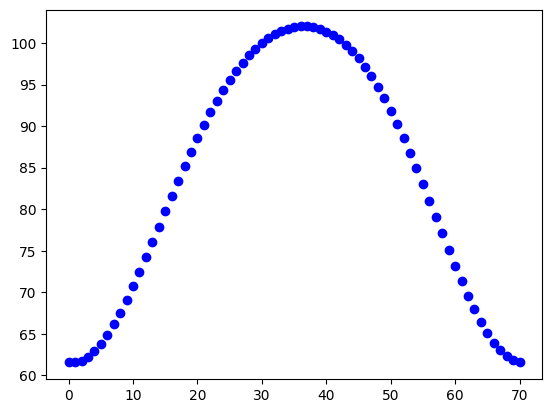

In [121]:

plt.plot(norms,'bo')

In [125]:
np.argmax(norms)

36

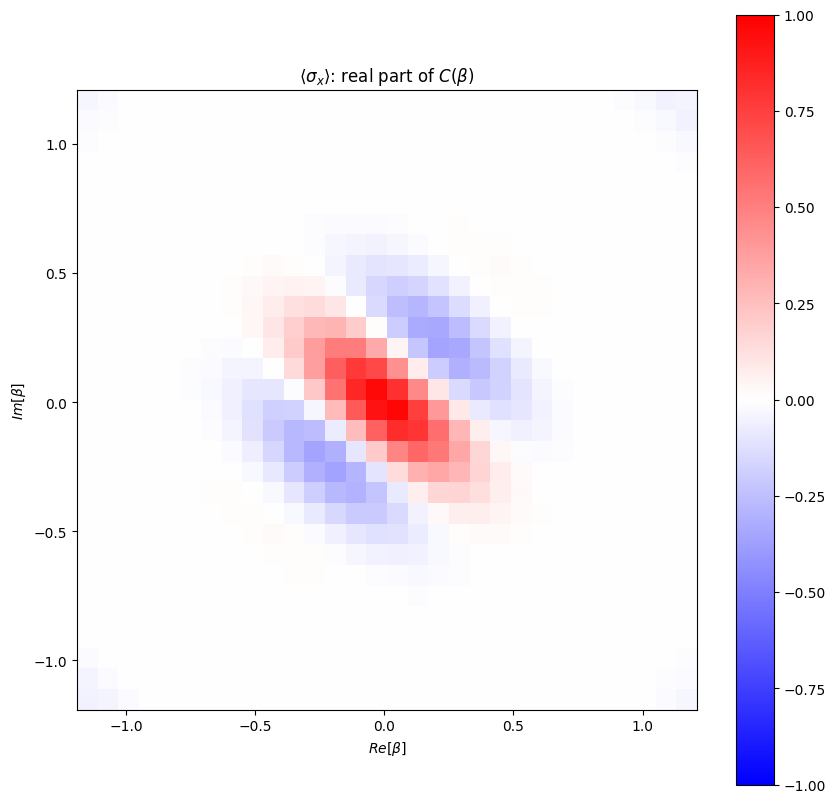

In [126]:
yvec = np.arange(-1, 1+0.05, 0.05)
state = (tensor(coherent(N, points[np.argmax(norms)]*np.exp(1j*(np.pi/2))),basis(2,0)))
cf = char_func_grid(state,xvec)

fig, ax = plt.subplots(figsize=(10,10))
cs1= ax.pcolormesh(xvec, xvec, cf, cmap = 'bwr', vmin=-1, vmax=1, shading='auto')
ax.set_aspect('equal')
ax.set_xlabel(r'$ Re[\beta]$')
ax.set_ylabel(r'$ Im[\beta]$')
ax.set_title(r'$\langle \sigma_x\rangle$: real part of $ C(\beta)$')
fig.colorbar(cs1)

In [127]:
90-np.angle(points[np.argmax(norms)] , deg = True)

-47.571428571428584